# Deep learning fundamentals

## What is deep learning 

- Deep learning is a subfield of machine learning.
- "Deep" means the idea of using successive layers of representation.

<img src="assets/1.png" alt="1" width="600"/>
<img src="assets/2.png" alt="1" width="600"/>
<p style="text-align:right">From "Deep learning with python"</p>

## Why we use it

- Superior performance
- Simple<br>
    Does not require feature engineering
- Scalable<br>
    Can be efficiently parallelled on GPUs to fit large amount of data.
- Versatile
    - continue train on additional data
    - transfer learning

## Training of a deep learning model

<img src="assets/3.png" alt="1" width="500"/>
<p style="text-align:right">From "Deep learning with python"</p>

### Data transformation

<img src="assets/neuron.png" alt="1" width="1000"/>

- Activation functions
    - basic and go-to: ReLu (rectified linear unit)<br><br>
        <img src="assets/relu.png" alt="1" width="300"/>
    - Others
        - sigmoid, binary or multi-label classification<br>
        $ \text{Sigmoid}(x) = \frac{1}{1+e^{-x}}$
        <br><br>
        - softmax, multi-class classification <br>
        $\text{Softmax}(x_{i}) = \frac{\exp(x_i)}{\sum_j \exp(x_j)}$
        <br><br>
        - leaky ReLu
        - tanh

### Common loss functions
- classfication
    - Binary cross entropy (binary classification) <br>
    $ L = -{(y\log(p) + (1 - y)\log(1 - p))}$
    <br><br>
    - Categorical cross entropy (multi-class classification) <br>
    $-\sum_{c=1}^My_{o,c}\log(p_{o,c})$
    <br><br>
    M - number of classes<br>
    y - binary indicator (0 or 1) if class label 𝑐 is the correct classification for observation 𝑜<br>
    p - predicted probability observation 𝑜 is of class 𝑐<br>
    <br><br>

- regression
    - mean squared error
    - mean absolute error
    - huber_loss
    - logcosh
    
<img src="assets/5.png" alt="1" width="800"/>


### Regularization
- Dropout
- Batchnormalization
- Regular regulatorization techniques, such as L1/L2 norm
- More data
- Less model complexity

### Optimizer
- Basic: SGD (Stochastic gradient descent)
- go-to optimizer: Adam (Adaptive Moment Estimation)

<img src="assets/4.gif" alt="4" width="500"/>

## Common neural network structures and when to use them

### Convolutional neural networks (CNN)
- Commonly used in computer vision.
    - hand writing recognition
    - google photos
    - ...
  <br><br>  

- [Convolution operation](http://cs231n.github.io/convolutional-networks/)
    - Can be view as sliding a filter (neuron)'s weights across different positions of the input matrix.
<img src="assets/conv.gif" alt="4" width="400"/>
<br><br>

- Architecture overview
    - Convolutional layer
    - Pooling layer
        - Max-pooling
        - Average-pooling
    - Fully connected layer
<img src="assets/conv_arch.jpeg" alt="4" width="900"/>
<br><br>

- [3d visualization of CNN](https://scs.ryerson.ca/~aharley/vis/conv/)
- [Some Variants](https://keras.io/applications/)
    - [Residual neural network (ResNet)](https://arxiv.org/pdf/1512.03385.pdf)
    - [Inception](https://arxiv.org/pdf/1512.00567.pdf)



### Recurrent neural networks (RNN)

- Commonly used in text and sequences predictions
    - Natural language processing, audio/video processing
    - Alexa/Siri
    - Machine translation
    - ...
     <br><br>  
     
- Architecture Overview
    <img src="assets/rnn_arch.png" alt="4" width="700"/>
    <br><br>

- Variants
    - LSTM (Long Short Term Memory Network)
    - GRU (Gated Recurrent Unit)

# Some applications of Deep learning of functional genomic sequences

| Models   | Structure              | REF                                                                        | Year |
|----------|------------------------|----------------------------------------------------------------------------|------|
| DeepBind | CNN                    | https://www.nature.com/articles/nbt.3300                                   | 2015 |
| DeepSEA  | CNN                    | https://www.nature.com/articles/nmeth.3547                                                                           | 2015 |
| DanQ     | CNN + LSTM             | https://www.ncbi.nlm.nih.gov/pubmed/27084946                               | 2016 |
| Basset   | CNN                    | https://genome.cshlp.org/content/26/7/990                                  | 2016 |
| BiRen    | Pretrained CNN + GRU   | https://academic.oup.com/bioinformatics/article/33/13/1930/3002766         | 2017 |
| DeepCpG  | CNN                    | https://genomebiology.biomedcentral.com/articles/10.1186/s13059-017-1189-z | 2017 |
| Expecto  | CNN, Linear regression | http://dx.doi.org/10.1038/s41588-018-0160-6                                | 2018 |

# An example of deep learning of genomic sequences

We will be using keras library as a tool to build and train a convolutional neural network for liver enhancer predictions.

## Set up environment

### ACCRE GPU
- Need to be a capra_lab_acc member
- Have access to maxwell nodes
- Example command
```
    salloc --partition=maxwell --account=capra_lab_acc --gres=gpu:1 --time=4:00:00 --mem=20G
```  
- [GPU Info](https://www.vanderbilt.edu/accre/documentation/parallel/)

### Required libraries
We will be using keras and tensorflow as backend.
```
ml GCC/6.4.0-2.28  CUDA/9.0.176  OpenMPI/2.1.1 TensorFlow/1.8.0-Python-3.6.3 Keras
ml matplotlib scikit-learn
ml Anaconda3
```

In [1]:
import sys
import numpy as np
from Bio import SeqIO
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

import warnings
warnings.filterwarnings("ignore")

## DNA sequence representation

### One-hot-encode DNA sequences
<img src="assets/onehot.png" alt="4" width="800"/>

In [2]:
def one_hot_encode(sequences):
    
    '''
    One hot encode DNA sequence (channels_last)
    Input: array of sequences
    Output: one hot encoded sequence arrays (n, 1, 4, len)
    '''
    sequence_length = len(sequences[0])
    integer_type = np.int8 if sys.version_info[0] == 2 else np.int32  # depends on Python version
    integer_array = LabelEncoder().fit(np.array(('ACGTN',)).view(integer_type))\
                                  .transform(sequences.view(integer_type))\
                                  .reshape(len(sequences), sequence_length)
    one_hot_encoding = OneHotEncoder(sparse=False, n_values=5)\
                                    .fit_transform(integer_array)
    return one_hot_encoding.reshape(len(sequences), sequence_length, 5, 1)\
                            .swapaxes(1, 2)[:, [0, 1, 2, 4], :, :]


def fasta2array(fname):

    '''
    Turn fasta sequence files to one hot encoding arrays
    Input: fasta file name
    Output: one hot encoded sequence arrays
    '''
    sequences = []
    sequence_ids = []
    fh = open(fname, "rU")
    for record in SeqIO.parse(fh,"fasta"):
        sequence_ids.append(record.id)
        sequences.append(str(record.seq).upper())

    return sequence_ids, one_hot_encode(np.array(sequences))

In [3]:
posfn = "../projects/EnhancerCodeConservationDNN/data/villar15/Hsap_Enhancers_gapexcluded_3000.bed4.fa"
negfn = "../projects/EnhancerCodeConservationDNN/data/villar15/Hsap_Enhancers_gapexcluded_3000.bed4.1_set_nongc.fa"

In [4]:
%%time
pos_seq_ids, pos_seq_arrs = fasta2array(posfn)

CPU times: user 34.6 s, sys: 3.5 s, total: 38.1 s
Wall time: 38.1 s


In [5]:
%%time
neg_seq_ids, neg_seq_arrs = fasta2array(negfn)

CPU times: user 37.9 s, sys: 3.56 s, total: 41.4 s
Wall time: 41.5 s


### Train, valid, test split

In [6]:
def train_valid_test_split(pos_encoded_seqs, neg_encoded_seqs,
                           pos_ids, neg_ids,
                           test_frac=0.1, valid_frac=0.1):
    '''
    Train, valid, test split
    Input: positive and negative one-hot-encoded sequences,
            positive and negative sequence ids,
           test and validation fraction.
    Output: train, valid, test splits   
    '''
    # combine postives and negatives
    pos_seq_size = pos_encoded_seqs.shape[0]
    neg_seq_size = neg_encoded_seqs.shape[0]
    scores = np.concatenate((np.ones(pos_seq_size),np.zeros(neg_seq_size)), axis=0)
    ids = []
    ids.extend(pos_ids)
    ids.extend(neg_ids)
    encoded_seqs = np.concatenate((pos_encoded_seqs,neg_encoded_seqs),axis=0)
    
    # train, valid, test split
    X_model, X_test, y_model, y_test, id_model, id_test =\
             train_test_split(encoded_seqs, scores, ids, test_size=test_frac)
    X_train, X_valid, y_train, y_valid, id_train, id_valid =\
             train_test_split(X_model, y_model, id_model, test_size=valid_frac)
    
    return X_train, X_valid, y_train, y_valid, id_train, id_valid,\
           X_test, y_test, id_test

In [7]:
X_train, X_valid, y_train, y_valid, id_train, id_valid,\
         X_test, y_test, id_test =\
         train_valid_test_split(pos_seq_arrs, neg_seq_arrs,
                                pos_seq_ids, neg_seq_ids,
                                test_frac=0.1, valid_frac=0.1)

In [8]:
print(" X_train:", X_train.shape, "\n",
      "y_valid:", y_valid.shape, "\n",
      "X_test:", X_test.shape)

 X_train: (47225, 4, 3000, 1) 
 y_valid: (5248,) 
 X_test: (5831, 4, 3000, 1)


## Build a simple convolutional neural network model

In [9]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization,\
                         Flatten, Dense, Dropout

Using TensorFlow backend.


In [10]:
model = Sequential()

# conv 1
model.add(Conv2D(filters=32, kernel_size=(4, 16),
                 activation="relu", input_shape=(4, 3000, 1)))
#model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(1, 4)))
model.add(Dropout(0.25))

# conv 2
model.add(Conv2D(filters=32, kernel_size=(1, 8), activation="relu"))
#model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(1, 4)))
model.add(Dropout(0.25))

# conv 3
model.add(Conv2D(filters=32, kernel_size=(1, 16), activation="relu"))
#model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(1, 4)))
model.add(Dropout(0.25))

# fc1
model.add(Flatten())
model.add(Dense(units=32, activation="relu"))

# output layer          
model.add(Dense(units=1, activation="sigmoid"))

# compile
model.compile(loss="binary_crossentropy", 
              optimizer="adam", 
              metrics=['acc'])

In [11]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 1, 2985, 32)       2080      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 1, 746, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 1, 746, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 1, 739, 32)        8224      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 1, 184, 32)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 1, 184, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 1, 169, 32)        16416     
__________

## Model training

### Callbacks

In [12]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

#### Early stopping
Prevent the model from overfitting the training data

In [13]:
early_stopping = EarlyStopping(monitor="val_loss", 
                               patience=5,
                               verbose=1)

#### Model checkpoint
Save the best model during training

In [14]:
best_model = ModelCheckpoint(filepath="best_model.h5",
                             monitor="val_loss", 
                             verbose=1, 
                             save_best_only=True, 
                             save_weights_only=False, 
                             mode='auto') 

In [15]:
callbacks = [early_stopping, best_model]

### Start training

In [16]:
hist = model.fit(X_train, y_train, 
                  batch_size=128, 
                  epochs=100, 
                  verbose=1, 
                  validation_data=(X_valid,y_valid),
                  shuffle=True,
                  callbacks=callbacks)

Train on 47225 samples, validate on 5248 samples
Epoch 1/100
47225/47225 [==============================] - 11s 223us/step - loss: 0.6475 - acc: 0.6196 - val_loss: 0.6225 - val_acc: 0.6574

Epoch 00001: val_loss improved from inf to 0.62254, saving model to best_model.h5
Epoch 2/100
47225/47225 [==============================] - 7s 146us/step - loss: 0.6296 - acc: 0.6423 - val_loss: 0.6110 - val_acc: 0.6755

Epoch 00002: val_loss improved from 0.62254 to 0.61104, saving model to best_model.h5
Epoch 3/100
47225/47225 [==============================] - 7s 146us/step - loss: 0.6046 - acc: 0.6697 - val_loss: 0.5695 - val_acc: 0.7067

Epoch 00003: val_loss improved from 0.61104 to 0.56947, saving model to best_model.h5
Epoch 4/100
47225/47225 [==============================] - 7s 146us/step - loss: 0.5819 - acc: 0.6914 - val_loss: 0.5793 - val_acc: 0.7060

Epoch 00004: val_loss did not improve from 0.56947
Epoch 5/100
47225/47225 [==============================] - 7s 147us/step - loss: 0.57

In [17]:
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rcParams["font.size"] = 20

def plot_training_hist(hist, acc='acc'):

    fig, (ax1, ax2) = plt.subplots(2, sharex=False, figsize=(15, 8))

    # plot acc history
    ax1.plot(hist.history[acc], color='#0343DF')  # xkcd: dark blue
    ax1.plot(hist.history['val_%s'%(acc)], color='#C65102') # xkcd: dark orange
    ax1.set_ylabel('ACC')
    ax1.legend(['train','validation'], loc='lower right')

    # plot loss history
    ax2.plot(hist.history['loss'], color='#0343DF')
    ax2.plot(hist.history['val_loss'], color='#C65102')
    ax2.set_xlabel('epoch')
    ax2.set_ylabel('loss')
    ax2.legend(['train','validation'], loc='upper left')
    
    plt.show()

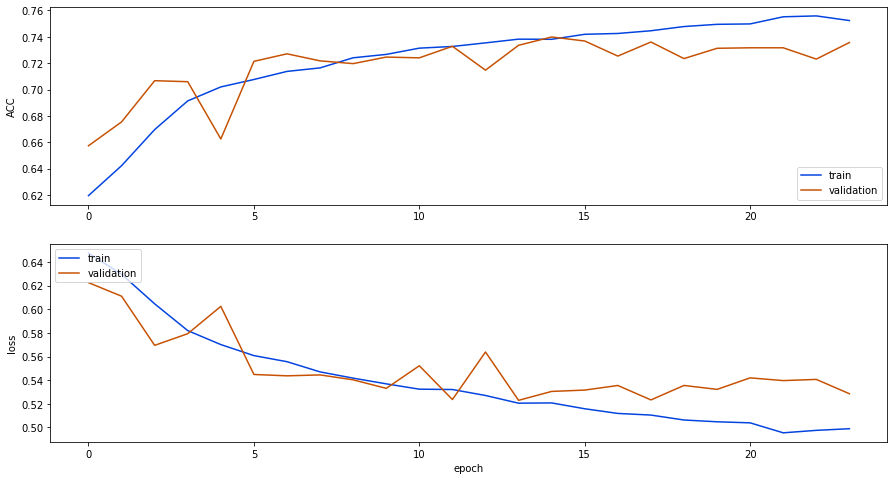

In [18]:
plot_training_hist(hist)

## Model Evaluation

In [19]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve 
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

def roc_pr(model, X, y):
      
    y_score = model.predict(X, batch_size=128, verbose=1)
    y_class = y_score > 0.5
    y_class = y_class.astype(int)

    roc_auc = roc_auc_score(y, y_score)
    fpr, tpr, _ = roc_curve(y, y_score)

    pr_auc =  average_precision_score(y, y_score)
    precision, recall, _ = precision_recall_curve(y, y_score)

    print('auROC: %s\nauPR: %s\n'%(roc_auc, pr_auc))

    roc_pr_plot = plt.figure(figsize=(8,16))
    ax1 = roc_pr_plot.add_subplot(211)
    ax1.plot(fpr, tpr, color='darkorange',lw=2, 
           label='ROC curve (area = %0.2f)' % roc_auc)
    ax1.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
    ax1.set_xlim([0.0, 1.0])
    ax1.set_ylim([0.0, 1.0])
    ax1.set_ylabel('True Positive Rate')
    ax1.set_title('Receiver operating characteristic')
    ax1.legend(loc="lower right")

    ax2 = roc_pr_plot.add_subplot(212)
    ax2.plot(recall, precision, lw=2, color='navy', 
           label='PR curve(area %0.2f)' % pr_auc )
    ax2.set_xlim([0.0, 1.0])
    ax2.set_ylim([0.0, 1.0])
    ax2.set_xlabel('Recall')
    ax2.set_ylabel('Precision')
    ax2.set_title('Precision-Recall curve')
    ax2.legend(loc="lower right")
    
    plt.show()

    return y_score, y_class

5831/5831 [==============================] - 1s 111us/step
auROC: 0.8089121199608005
auPR: 0.7806187500682785



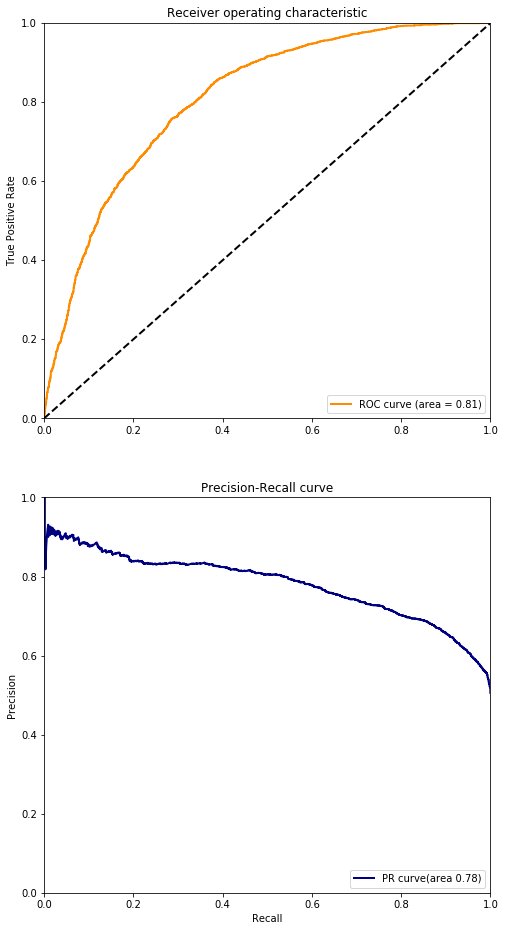

In [20]:
y_score, y_class = roc_pr(model, X_test, y_test)

## Other
   - Hyperparameter selection
       - hyperopt
   - What is the data cannot fit in the memory?
       - data generator

## Model interpretation
    - 1st layer
      - PWM of maximally activating sequences
    - 2nd and above
      - back propagation gradients
      - activation maximization

# Resources
- A nice compilation of general deep learning resources <br>
https://github.com/ChristosChristofidis/awesome-deep-learning
<br><br>

- Books
    - [Deep learning with Python, Francois Chollet](http://faculty.neu.edu.cn/yury/AAI/Textbook/Deep%20Learning%20with%20Python.pdf)
    - http://www.deeplearningbook.org/ (Ian Goodfellow, Yoshua Bengio, Aaron Courville)
- Online courses
    - [stanford cs273b, Deep Learning in Genomics and Biomedicine](https://canvas.stanford.edu/courses/51037)
    - [stanford cs231n, Convolutional Neural Networks for Visual Recognition](http://cs231n.stanford.edu/)
    - [stanford cs230, deep learning, Andrew Ng](https://cs230.stanford.edu/)
    - [stanford cs224d, Deep Learning for Natural Language Processing](https://cs224d.stanford.edu/index.html)
    - Coursera, deep learning specialization, Andrew Ng
- Deep learning literature in biology 
    - [a not comprehensive list](https://github.com/hussius/deeplearning-biology)
- Other
    - [The Unreasonable Effectiveness of Recurrent Neural Networks](http://karpathy.github.io/2015/05/21/rnn-effectiveness/)
    - [Understanding LSTM Network](https://colah.github.io/posts/2015-08-Understanding-LSTMs/)
    - [Recurrent neural network cheatsheet](https://stanford.edu/~shervine/teaching/cs-230/cheatsheet-recurrent-neural-networks)
    - [regression loss functions](https://heartbeat.fritz.ai/5-regression-loss-functions-all-machine-learners-should-know-4fb140e9d4b0)